# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [34]:
import pandas as pd
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [8]:
temp_ = pd.read_csv('Temp_States.csv')
temp = pd.DataFrame(temp_)

#### Print `temp`

In [10]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

#### Select the rows where state is New York

In [17]:
NY = temp[temp['State'] == 'New York']
NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [124]:
NY['Temperature'].mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [23]:
temp_15 = temp[temp['Temperature'] > 15]
temp_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [125]:
cities_15 = temp_15[['City', 'Temperature']]
cities_15

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [128]:
temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20), 'City']


0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [134]:
state = temp.groupby("State")
mean_temp_state = state.mean()
mean_temp_state

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [135]:
std_temp_state = state.std()
std_temp_state

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [33]:
employee_ = pd.read_csv('employee.csv')
employee = pd.DataFrame(employee_)
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# your answer here


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:xlabel='Education', ylabel='Count'>

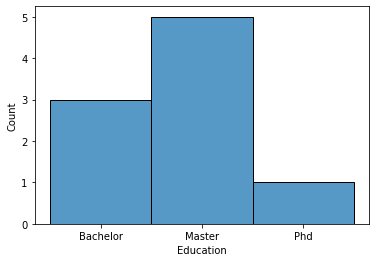

In [54]:
sns.histplot(data=employee, x='Education')
#Most have a Master Degree

<AxesSubplot:xlabel='Title', ylabel='Count'>

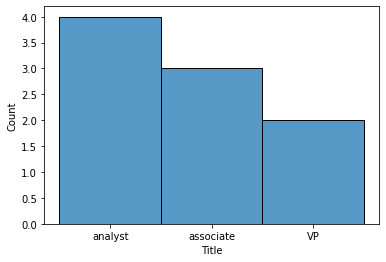

In [55]:
sns.histplot(data=employee, x='Title')
# There are more analyst than any other position

<AxesSubplot:xlabel='Gender', ylabel='Count'>

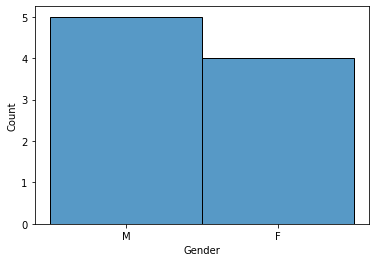

In [56]:
sns.histplot(data=employee, x='Gender')
#There are more men than women

#### What's the average salary in this company?

In [59]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [62]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [63]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [70]:
employee.loc[(employee['Salary'] == 30), 'Name']



1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [71]:
employee.loc[(employee['Name'] == 'David')]


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [72]:
employee.loc[(employee['Name'] == 'David'), 'Salary']




2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [74]:
employee.loc[(employee['Title'] == 'associate')]



,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [76]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [136]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [81]:
employee.loc[(employee['Title'] == 'associate') & (employee['Salary'] > 55), 'Name']



7    Pedro
Name: Name, dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [84]:
employee.groupby(['Years']).mean()



,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [137]:
employee.groupby(['Title']).mean()



,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:xlabel='Salary'>

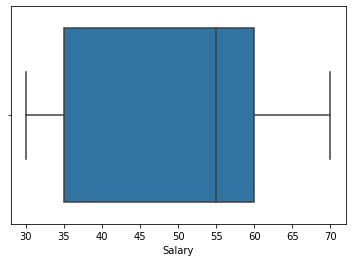

In [88]:
sns.boxplot(x="Salary", data=employee)

In [89]:
employee.quantile(0.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [90]:
employee.quantile(0.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [138]:
employee.groupby(['Gender']).agg({'Salary':'mean'})

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [139]:
employee.groupby('Department').agg(['min', 'mean', 'max']).select_dtypes('number')

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [140]:
difference = lambda x: x['Salary'].max() - x['Salary'].min()
employee.groupby('Department').apply(difference)

Department
HR       40
IT       40
Sales     0
dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [175]:
orders_ = pd.read_csv('Orders.csv')
orders = pd.DataFrame(orders_)
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [141]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
# your answer here

####  What is the average Purchase Price?

In [143]:
orders['amount_spent'].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [144]:
orders['amount_spent'].min()

0.0

In [145]:
orders['amount_spent'].max()

168469.6

#### Select all the customers we have in Spain

In [151]:
spain_cust = orders.loc[orders['Country']=='Spain']

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [155]:
orders.Country.value_counts().Spain

2485

#### Select all the customers who have bought more than 50 items ?

In [159]:
morethan50 = orders.loc[orders['Quantity'] > 50]

#### Select orders from Spain that are above 50 items

In [166]:
morethan50_spain = orders.loc[(orders['Quantity'] > 50) & (orders['Country']=='Spain')]

#### Select all free orders

In [168]:
free = orders.loc[(orders["amount_spent"] == 0)]

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [170]:
lunch_bag = orders[orders['Description'].str.startswith('lunch bag')]

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [172]:
lunch_bag_2011 = orders[orders['Description'].str.startswith('lunch bag') & (orders['year']==2011)]

#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:>

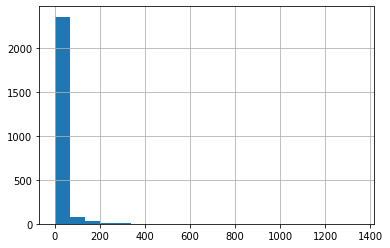

In [173]:
orders.loc[orders['Country'] == 'Spain', 'amount_spent'].hist(bins= 20)

#### Select all orders made in the month of August

In [179]:
august = orders.loc[orders['month'] == 8]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [182]:
orders.loc[orders['month']==8, 'Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [184]:
orders.groupby('Country').agg({'amount_spent':'mean'})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [185]:
orders['UnitPrice'].max()

8142.75

In [189]:
orders.loc[orders['UnitPrice'] == 8142.75]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [186]:
orders.groupby('year').agg({'amount_spent':'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
